# 1. 在旧金山做不同工作工资数据集

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
plt.style.use('fivethirtyeight')
#导入数据

In [7]:
salary_ranges = pd.read_csv('~/开发/AI相关/特征工程/Feature-Engineering-Made-Easy-master/data/Salary_Ranges_by_Job_Classification.csv')

In [8]:
#查看前几行数据
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [9]:
#查看数据有多少行，是否有缺失值，以及每列的数据类型
salary_ranges.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [10]:
#计算缺失值
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [11]:
#查看一些定量数据的描述性统计，describe方法默认描述定量列，没有定量列，也会描述定性列
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


pands认为，数据只有三个定量列:Step，Union Code和Extended Step。 但是很明显其中的Union Code就不是定量数据，只不过是部门的代码而已。在这个数据当中我们感兴趣的是一个定量列Biweekly High Rate和一个定性列Grade。

In [13]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]
salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [14]:
#清理一下数据，移除工资前面的美元符号。
#处理定量数据一般使用整数或浮点数作为数据类型
#处理定性数据一般使用字符串或Unicode对象
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$', ''))
salary_ranges.head()

/Users/super/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [15]:
#将Biweekly High Rate转换为浮点数
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
#将Grade转换为字符串类型
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


/Users/super/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/super/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


现在我们有两列数据，BiWeekly High Rate代表双周最高工资，是定量列，代表某个部门的最高工资，Grade是工资所对应的部门

In [17]:
#对Grade进行分类统计
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07170     9
06870     9
07420     9
Name: Grade, dtype: int64

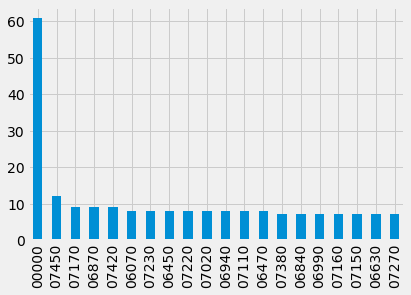

In [18]:
#绘制条形图进行显示，定类等级数据
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

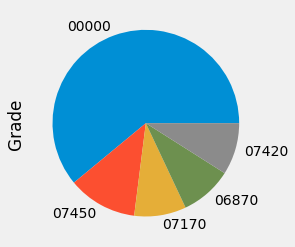

In [19]:
#也可以用饼形图显示数据
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

In [61]:
#查看那个工资最高，用条形图显示，是定比等级数据
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1, 'Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Top 20 Grade by Mean Biweekly High Rate')

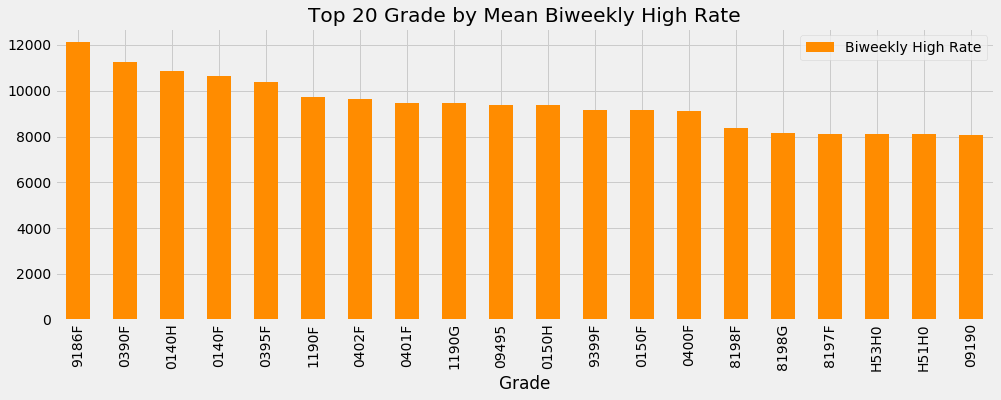

In [62]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Bottom 20 Grade by Mean Biweekly High Rate')

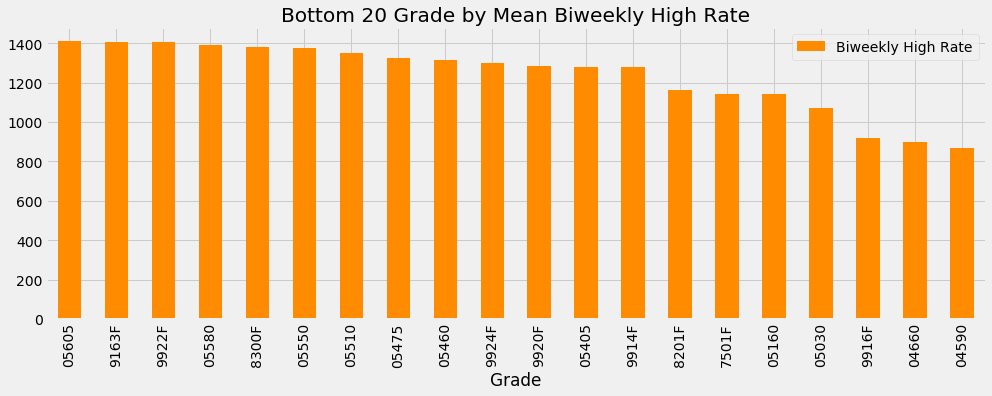

In [63]:
#查看哪些工资最低
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Bottom 20 Grade by Mean Biweekly High Rate')

In [64]:
#我们可以观察一下工资最高与工资最低相差的比值
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False)
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

13.931919540229886

可以看到最高工资与最低工资相差13倍之多

# 2. 多少人喜欢旧金山国际机场数据集

In [23]:
customer = pd.read_csv('~/开发/AI相关/特征工程/Feature-Engineering-Made-Easy-master/data/2013_SFO_Customer_survey.csv')

In [24]:
customer.shape

(3535, 95)

In [26]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

可以看到这个数据集中包含很多数据，在这里我们只关心`Q7A_ART`这列数据，这列数据是关于艺术品和展览的，有几个值

- 1: 不可接受
- 2: 低于平均
- 3: 平均
- 4: 不错
- 5: 特别好
- 6: 从未有人使用或参观过
- 0: 空

In [33]:
customre.isnull().sum()

RESPNUM               0
CCGID                 0
RUN                   0
INTDATE               0
GATE                  0
STRATA                0
PEAK                  0
METHOD                0
AIRLINE               0
FLIGHT                0
DEST                  0
DESTGEO               0
DESTMARK              0
ARRTIME               0
DEPTIME               0
Q2PURP1               0
Q2PURP2              76
Q2PURP3            3372
Q2PURP4            3518
Q2PURP5            3533
Q2PURP6            3535
Q3GETTO1              0
Q3GETTO2             30
Q3GETTO3           3518
Q3GETTO4           3534
Q3GETTO5           3535
Q3GETTO6           3535
Q3PARK             3251
Q4BAGS                0
Q4BUY                 0
                   ... 
Q10COM3            3521
Q11A_USEWEB           0
Q11B_USESFOAPP        0
Q11C_USEOTHAPP        0
Q11D_USESOCMED        0
Q11E_USEWIFI          0
Q12COM1            2829
Q12COM2            3460
Q12COM3            3533
Q13_WHEREDEPART       0
Q13_RATEGETTO   

In [29]:
art_ratings = customer['Q7A_ART']
#这列数据是一个定型数据，没个数字代表不同类型
#如果我们把其中0和6去掉，更类似于一个评分的排序
art_ratings = art_ratings[(art_ratings>=1) & (art_ratings<=5)]
#将数值转换为字符串
art_ratings = art_ratings.astype(str)
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

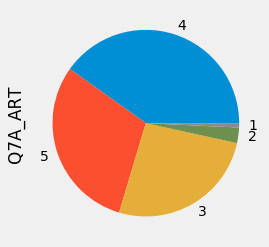

In [30]:
#用饼形图来显示一下数据，定序数据
art_ratings.value_counts().plot(kind='pie')

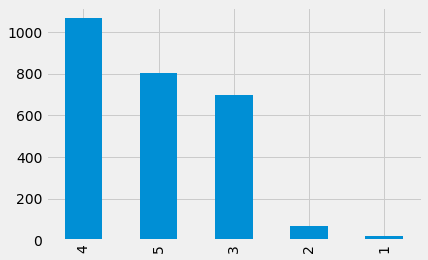

In [31]:
#用条形图显示数据
art_ratings.value_counts().plot(kind='bar')

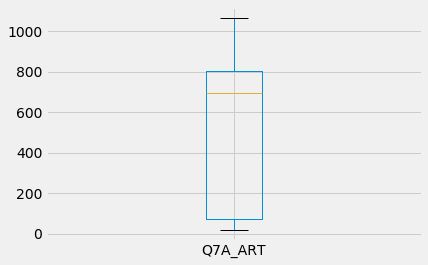

In [32]:
#还可以用箱型图可视化数据
art_ratings.value_counts().plot(kind='box')

# 3. 气候变化数据集

In [38]:
climate = pd.read_csv('~/开发/AI相关/特征工程/Feature-Engineering-Made-Easy-master/data/GlobalLandTemperaturesByCity.csv')

In [39]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [40]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [41]:
climate.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [42]:
#去掉缺失值
climate.dropna(axis=0, inplace=True)
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [43]:
climate.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


我们关注的是AverageTemperature列。温度数据属于定量数据属于定距数据，我们没法显示所有温度值，因为数据量过大

In [44]:
#显示AverageTemperature中独特数值的数量
climate['AverageTemperature'].nunique()

111994

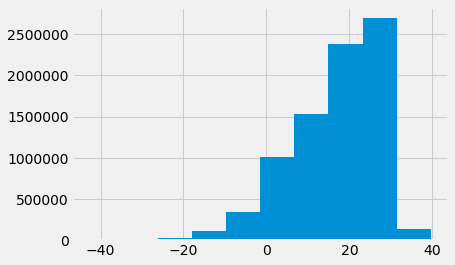

In [45]:
#用直方图显示数据
climate['AverageTemperature'].hist()

In [50]:
#将dt列数据转换为日期，并取年份
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

In [51]:
#只看美国的数据
climate_sub_us = climate.loc[climate['Country'] == 'United States']
#并将年份转换为世纪,1983会变成20
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: int(x/100+1))

/Users/super/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23ef06d8>,
      dtype=object)

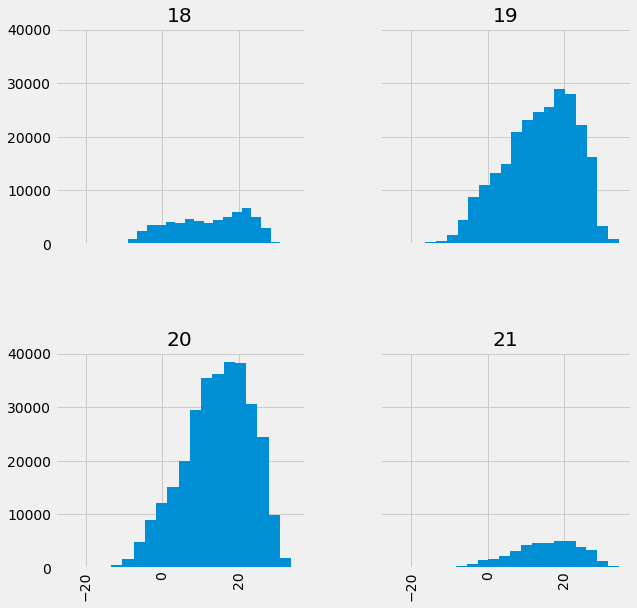

In [52]:
#对每个世纪显示直方图
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], 
                                          sharex=True, sharey=True, 
                                          figsize=(10, 10), 
                                          bins=20)

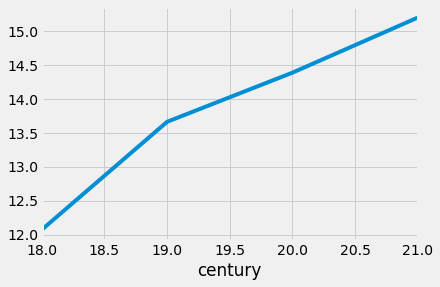

In [53]:
#用折线图表示
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

差值在定距等级中有意义的，所以我们可以回答美国从18世纪至今温度上升多少的问题

In [54]:
#把世纪温度的变化数据存储到Pandas的Series对象中
century_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()

In [56]:
century_changes

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

In [57]:
#用21世纪的温度数据减去18世纪的温度数据
century_changes[21] - century_changes[18]

3.124449115460754

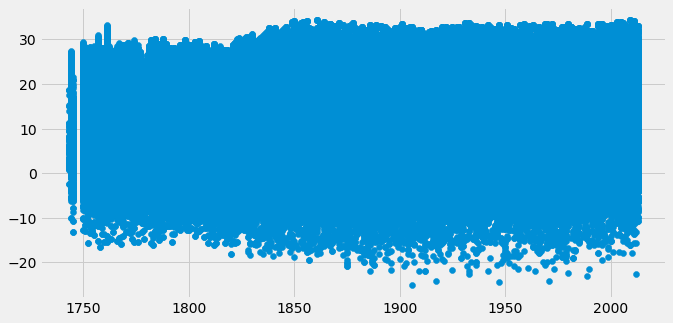

In [58]:
#按年显示温度的变化
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()
#但是显示效果并不好

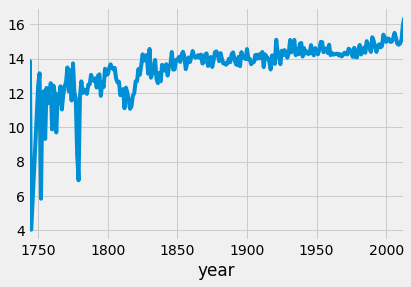

In [59]:
#我们使用groupby清除年份数据中的噪声
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

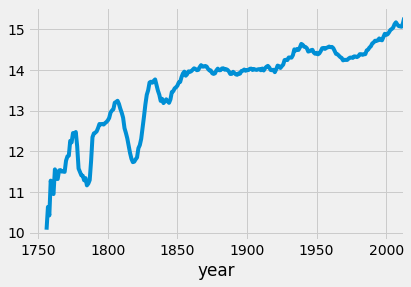

In [60]:
#使用滑动均值平滑图像
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()